<a href="https://colab.research.google.com/github/juanchess98/Notebooks-Deep-Learning/blob/regresion-lineal/Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import keras

# Teoria 

Es un método para predecir una variable objetivo ajustando la mejor relación lineal entre la variable independiente (predictor) y la dependendiente (target) $$ \hat{y} = wx + b$$

- $\hat{y}$ es el valor predicho.
- $x$ es el valor de la característica.
- $w$ y $b$ son la pendiente y el termino de sesgo respectivamente. Estos son los parametros del modelo que se deben ajustar para obtener la mejor aproximación. Usualmente se denotan con un vector de la siguiente manera:
$$\theta = \left [ \theta _{0}, \theta _{1}, ..., \theta _{p} \right]$$ donde $p$ denota el número de características o variables independientes del modelo.



# Ilustración

# ¿Cómo encontrar la mejor representación?

Entrenar a un modelo significa establecer los parametetros del modelo tal que este se ajuste de la mejor manera posible al conjunto de entrenamiento. Para este proposito se necesita establecer una medida que indique que tan bien o mal el modelo se está ajustando a estos. Esto se denomina Función de costo.

$$L(\mathbf{w},b) = \frac{1}{n}\sum_{i=1}^{n}\left (\hat{y}^{i} - y^{i}  \right )^{2}$$

se debe determinar  los valores de $w$ y $b$ que optimizan esta función.

Para abordar este problema de optimización se pueden utilizar los siguientes metodos:
- Solución análitíca
- Descenso del gradiente y variantes



In [ ]:
print('hi')

# Gradiente Descendente

El gradiente descendente es una tecnica de optimización basada en derivadas parciales que nos permite capaz de encontrar una solución optima a una gran variedad de problemas. La idea central de este algoritmo es afinar de manera iterativa los parametros del modelo con el fin de minimizar la función de costo.

![Gradiente descendente](https://drive.google.com/uc?id=1dbzBox3wnq6cNWgSDERYI4Jre-Enao3u)

Un parametro muy importante en este algoritmo es la tasa de aprendizaje. Al momento de determinar este parametro o hiperparametrocomo es denominado dentro de los modelos es que no sea demasiado pequeño ni demasiado grande.

Si el valor de la tasa de aprendizaje es muy pequeño el algoritmo tendrá que realizar muchas más iteraciones para converger. Esto se traduce en mayor tiempo de ejecución.

![Tasa de aprendizaje baja](https://drive.google.com/uc?id=1u0wUPfgFKpZEefz5HDN2IzkP1TH9RXzh)

Por otro lado, si la tasa de aprendizaje es un valor muy alto, el algoritmo muy probablemente va a divergir por que podría saltar de un lado a otro.


![Tasa de aprendizaje alta](https://drive.google.com/uc?id=1ZTefxW01N_NzYmk8u8hwDfROse9V3HPj)

Por ultimo, a la hora de utilizar este metodo se debe tener encuenta cual función de costo se desea optimizar, ya que hay funciones que provocan que converger al minimo sea muy dificil. Por un lado puede suceder que la función de costo tenga muchos minimos locales y dependiendo el punto inicial del algoritmo el algoritmo va a converger a un minimo local y no a un minimo global como se desea. Por otra parte, se puede presentar que en un lugar de está función las derivadas sean muy cercanos a cero y harán que el algoritmo necesite muchas más iteracciones para converger.

![Tasa de aprendizaje alta](https://drive.google.com/uc?id=1F_Wvwn3kKTnGLX68Ok1dQqFhQA_WLfOY)

# Stochastic Gradient Descent

In [11]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features = 1, noise = 20, random_state=1)

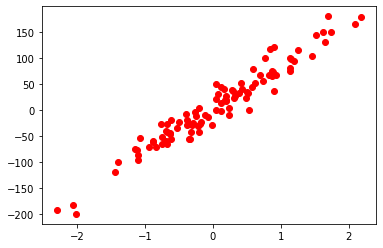

In [7]:
#Visualización Datos generados
plt.plot(X_numpy, y_numpy, 'ro')
plt.show()

# Implementación Keras

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
import keras

def regresion_lineal_keras(X, Y, dim = 1, num_ite = 50):
  inputs = Input(shape=(dim,))
  preds = Dense(1,activation='linear')(inputs)
  model = Model(inputs=inputs,outputs=preds)
  sgd=keras.optimizers.SGD(lr = 0.001)
  model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
  model.fit(X,Y, batch_size=1, epochs=num_ite, shuffle=False)
  return  model.get_weights()

In [21]:
w, b = regresion_lineal_keras(X_numpy, y_numpy, dim = 1, num_ite = 200)

Epoch 1/200
100/100 [==============================] - 0s 844us/step - loss: 4932.5154 - mse: 4932.5154
Epoch 2/200
100/100 [==============================] - 0s 788us/step - loss: 3652.4701 - mse: 3652.4701
Epoch 3/200
100/100 [==============================] - 0s 837us/step - loss: 2727.2608 - mse: 2727.2608
Epoch 4/200
100/100 [==============================] - 0s 877us/step - loss: 2058.0516 - mse: 2058.0516
Epoch 5/200
100/100 [==============================] - 0s 845us/step - loss: 1573.7393 - mse: 1573.7393
Epoch 6/200
100/100 [==============================] - 0s 963us/step - loss: 1223.0980 - mse: 1223.0980
Epoch 7/200
100/100 [==============================] - 0s 816us/step - loss: 969.1716 - mse: 969.1716
Epoch 8/200
100/100 [==============================] - 0s 917us/step - loss: 785.2740 - mse: 785.2740
Epoch 9/200
100/100 [==============================] - 0s 885us/step - loss: 652.1110 - mse: 652.1110
Epoch 10/200
100/100 [==============================] - 0s 865us/step 

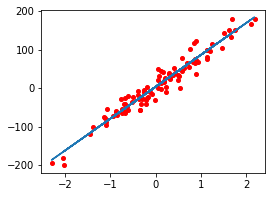

In [22]:
fig = plt.figure(figsize=(4,3))
plt.plot(X_numpy,y_numpy,'or',markersize=4)
plt.plot(X,np.dot(X_numpy,w)+b)
plt.show()

In [ ]:
def regresion_lineal_keras_2(X, Y, dim = 1, num_ite = 50):

  model = keras.Sequential([
        Input(shape=(dim,)),
        Dense(1, activation='linear')
    ])
  optmizer = keras.optimizers.SGD(learning_rate=0.001)
  model.compile(optimizer=optimizer ,loss='mse',metrics=['mse'])
  model.fit(X,Y, batch_size=1, epochs=num_ite, shuffle=False)
  return  model.get_weights()

Explicación relacionada a la implementación

# Observación ajuste de parametros -- Helper

# Implementación Pytorch

1) Design Model
2)Construct Loss and optimizer
3)Training Loop: Forward pass, backward pass, update weights


In [9]:
import torch
import torch.nn as nn

In [12]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1) ##reshape tensor

n_samples, n_features = X.shape

In [13]:
input_size = n_features
output_size = 1
model = nn.Linear(in_features = input_size, out_features = output_size )

In [14]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params= model.parameters(),lr = learning_rate)

In [16]:
num_epochs = 500
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted, y)

  #backward
  loss.backward()

  ##update
  optimizer.step()

  optimizer.zero_grad() ## clean gradients to next iteration

  if(epoch+1) % 10 == 0:
    print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')

epoch: 10, loss = 498.0992
epoch: 20, loss = 453.3969
epoch: 30, loss = 420.7984
epoch: 40, loss = 397.0157
epoch: 50, loss = 379.6577
epoch: 60, loss = 366.9842
epoch: 70, loss = 357.7278
epoch: 80, loss = 350.9649
epoch: 90, loss = 346.0226
epoch: 100, loss = 342.4099
epoch: 110, loss = 339.7684
epoch: 120, loss = 337.8366
epoch: 130, loss = 336.4236
epoch: 140, loss = 335.3899
epoch: 150, loss = 334.6335
epoch: 160, loss = 334.0800
epoch: 170, loss = 333.6750
epoch: 180, loss = 333.3784
epoch: 190, loss = 333.1613
epoch: 200, loss = 333.0024
epoch: 210, loss = 332.8860
epoch: 220, loss = 332.8008
epoch: 230, loss = 332.7384
epoch: 240, loss = 332.6927
epoch: 250, loss = 332.6592
epoch: 260, loss = 332.6347
epoch: 270, loss = 332.6168
epoch: 280, loss = 332.6036
epoch: 290, loss = 332.5939
epoch: 300, loss = 332.5869
epoch: 310, loss = 332.5817
epoch: 320, loss = 332.5779
epoch: 330, loss = 332.5752
epoch: 340, loss = 332.5732
epoch: 350, loss = 332.5717
epoch: 360, loss = 332.5705
e

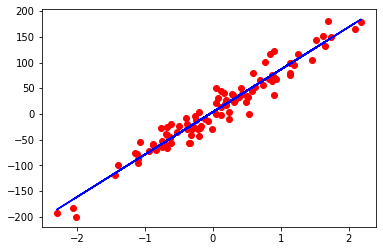

In [17]:
#plot
predicted = model(X).detach().numpy() # detach --gradient argument set to false
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

# Explicación relacionada a la implementación

# Observación de ajuste de parametros -- Helper